input tensor shape:  (1, 224, 224, 3)
output tensor:  [-128  127  -36]
prediction index: 1
predict label:  meituan
img like following:


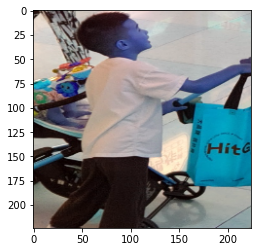

input tensor shape:  (1, 224, 224, 3)
output tensor:  [-128  127  -36]
prediction index: 1
predict label:  meituan
img like following:


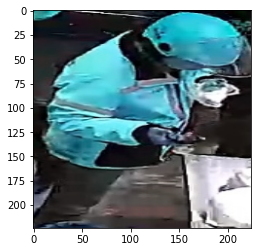

input tensor shape:  (1, 224, 224, 3)
output tensor:  [-128  127  -36]
prediction index: 1
predict label:  meituan
img like following:


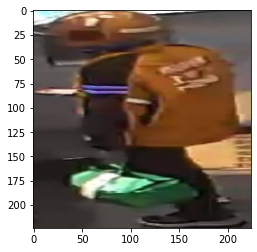

In [25]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
import cv2

label = ['elemen', 'meituan', 'others']

def preprocess(image):	# 输入图像预处理
    image = cv2.resize(image, (160, 120)) 
    tensor = np.expand_dims(image, axis=[0])
    tensor -= 128.0
    tensor = tensor.astype('int8')
    print("input tensor shape: ",np.shape(tensor))
    return tensor

interpreter = tf.lite.Interpreter("/home/zya/zya/IMX500/ISV_training/Ovapark/model_int8N.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

# img1
path = "1.png"
img = cv2.imread(path)
input_tensor = preprocess(img)
interpreter.set_tensor(input_details["index"], input_tensor)
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
print("output tensor: ",output)
predictions = output.argmax()
print("prediction index:", predictions)
print("predict label: ", label[predictions])
print("img like following:")
img = cv2.resize(cv2.imread(path), (224, 224))
plt.imshow(img)
plt.show()

# img2
path = "2.png"
img = cv2.imread(path)
input_tensor = preprocess(img)
interpreter.set_tensor(input_details["index"], input_tensor)
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
print("output tensor: ",output)
predictions = output.argmax()
print("prediction index:", predictions)
print("predict label: ", label[predictions])
print("img like following:")
img = cv2.resize(cv2.imread(path), (224, 224))
plt.imshow(img)
plt.show()

# img3
path = "3.png"
img = cv2.imread(path)
input_tensor = preprocess(img)
interpreter.set_tensor(input_details["index"], input_tensor)
interpreter.invoke()
output = interpreter.get_tensor(output_details["index"])[0]
print("output tensor: ",output)
predictions = output.argmax()
print("prediction index:", predictions)
print("predict label: ", label[predictions])
print("img like following:")
img = cv2.resize(cv2.imread(path), (224, 224))
plt.imshow(img)
plt.show()


Output tensor:  [[-128  127  -36]]
Predicted class:  [1]
Predicted label:  meituan


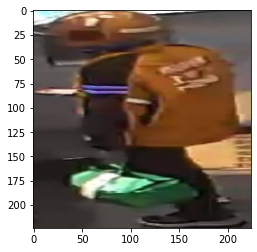

In [23]:
import numpy as np
import tensorflow as tf

# 加载TFLite模型
model_path = '/home/zya/zya/IMX500/ISV_training/Ovapark/model_int8N.tflite'  # 替换为你的TFLite模型路径
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# 获取输入和输出张量的索引
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 读取测试图像
image_path = "3.png"  # 替换为你的测试图像路径
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, (input_details[0]['shape'][1], input_details[0]['shape'][2]))
image = tf.cast(image, tf.float32)
image = image * 255.0
image = tf.cast(image, tf.int8)
input_image = np.expand_dims(image.numpy(), axis=0).astype(np.int8)

# 推理
interpreter.set_tensor(input_details[0]['index'], input_image)
interpreter.invoke()

# 获取输出
output_data = interpreter.get_tensor(output_details[0]['index'])

# 输出分类结果
class_indices = np.argmax(output_data, axis=1)
print("Output tensor: ", output_data)
print("Predicted class: ", class_indices)
print("Predicted label: ", label[class_indices[0]])
img = cv2.resize(cv2.imread(image_path), (224, 224))
plt.imshow(img)
plt.show()